# Topic Model

Anggota Kelompok:
1. Rizki Rahman Maulana (F1D022093)
2. Fernandao Kwangtama Tekayadi (F1D022120)

In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [2]:
df = pd.read_csv('climate_tweets.csv')

### String Comparison

bandingin dua teks, apakah sama atau beda

In [3]:
string1 = 'climate'
string2 = 'climb'

print(string1 == string2)        # False
print(string1[:4] == string2[:4])  # True, karena 'clim' == 'clim'


False
True


### Lambda Function

Cara singkat bikin function tanpa def dan nama function

In [4]:
# Fungsi normal
def my_normal_function(x):
    return x**2 + 10

# Fungsi lambda
my_lambda_function = lambda x: x**2 + 10

print(my_normal_function(3))   # 19
print(my_lambda_function(3))   # 19


19
19


### Finding Retweets

In [5]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets
print(f"Jumlah retweet: {df['is_retweet'].sum()}")

Jumlah retweet: 773


In [6]:
unique_retweets = df.loc[df['is_retweet'], 'tweet'].nunique()
print(f"Jumlah unique retweet: {unique_retweets}")

Jumlah unique retweet: 677


In [7]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,tweet,counts
3131,No matter if you believe in global warming or ...,20
4555,Take Action @change: Help Protect Wildlife Hab...,14
4027,RT @newtgingrich: Historic snow storm in washi...,9
1765,Fight Climate Change From All Fronts: [link],8
1626,Earth's polar ice sheets vulnerable to even mo...,7
1941,Global Warming Dent's El Ni'o's Protective Shi...,7
1799,Foes of California's global warming law pour m...,6
1351,Coalition of the Tired of Waiting: Fighting Cl...,6
4271,SCIENCE: Scientists explore the evolution of c...,6
1040,Carbon offsets: How a Vatican forest failed to...,6


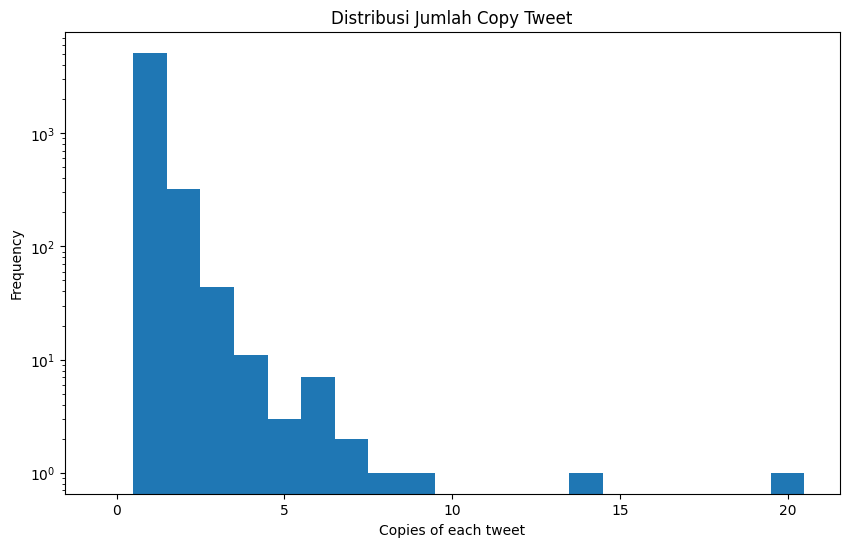

In [8]:
counts = df.groupby('tweet').size().reset_index(name='counts')['counts']

my_bins = np.arange(0, counts.max() + 2, 1) - 0.5

plt.figure(figsize=(10,6))
plt.hist(counts, bins=my_bins)
plt.xlabel('Copies of each tweet')
plt.ylabel('Frequency')
plt.yscale('log')  # supaya skala Y logaritmik, biar jelas distribusinya
plt.title('Distribusi Jumlah Copy Tweet')
plt.show()


### Extract substrings with RE

untuk cari kata-kata unik

In [9]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\iki_rhmn\AppData\Local\Temp\ipykernel_6512\898943074.py:3: SyntaxWarning: invalid escape sequence '\s'
  return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
C:\Users\iki_rhmn\AppData\Local\Temp\ipykernel_6512\898943074.py:7: SyntaxWarning: invalid escape sequence '\s'
  return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)


In [10]:
my_tweet = 'RT @our_codingclub: Can @you find #all the #hashtags?'
my_other_tweet = 'Not a retweet. All views @my own'

print(find_retweeted(my_tweet))    # Output: ['@our_codingclub']
print(find_mentioned(my_tweet))    # Output: ['@you']
print(find_hashtags(my_tweet))     # Output: ['#all', '#hashtags']

print(find_retweeted(my_other_tweet))  # Output: []
print(find_mentioned(my_other_tweet))  # Output: ['@my']
print(find_hashtags(my_other_tweet))   # Output: []


['@our_codingclub']
['@you']
['#all', '#hashtags']
[]
['@my']
[]


In [11]:
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)
df.tail(5)


,tweet,is_retweet,retweeted,mentioned,hashtags
6085,"@bloodless_coup ""The phrase 'global warming' s...",False,[],[@bloodless_coup],"[#p2, #tcot]"
6086,Virginia to Investigate Global Warming Scienti...,False,[],[],[]
6087,Global warming you tube parody you will enjoy ...,False,[],[],"[#IPCC, #ocra]"
6088,One-Eyed Golfer: Don't dare tell me about glob...,False,[],[],[]
6089,man made global warming a hair brained theory ...,False,[],[],"[#tcot, #p2, #climategate]"


### Keyword Correlation

Hashtag mana yang paling sering muncul alias populer?

Seberapa sering tiap hashtag dipakai?

Dari situ, kita bisa tau topik atau isu apa yang lagi viral di tweet tentang iklim.

In [12]:
hashtags_list_df = df.loc[df.hashtags.apply(lambda hashtags_list: hashtags_list != []), ['hashtags']]


Kita cuma mau ambil baris yang isinya list hashtag yang gak kosong, alias yang beneran ada hashtag.

In [13]:
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags for hashtag in hashtags_list],
    columns=['hashtag']
)


Ubah list hashtag jadi satu hashtag per baris, supaya gampang analisis

Hitung berapa banyak hashtag unik dan frekuensinya

In [14]:
flattened_hashtags_df['hashtag'].unique().size


477

In [17]:
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
print(f"Popular hashtag : {popular_hashtags}")

Popular hashtag :             hashtag  counts
0             #tcot     227
1          #climate     202
2               #p2     112
3            #green      50
4    #climatechange      47
..              ...     ...
472           #home       1
473           #hoth       1
474        #houston       1
475    #humanrights       1
476           #digg       1

[477 rows x 2 columns]


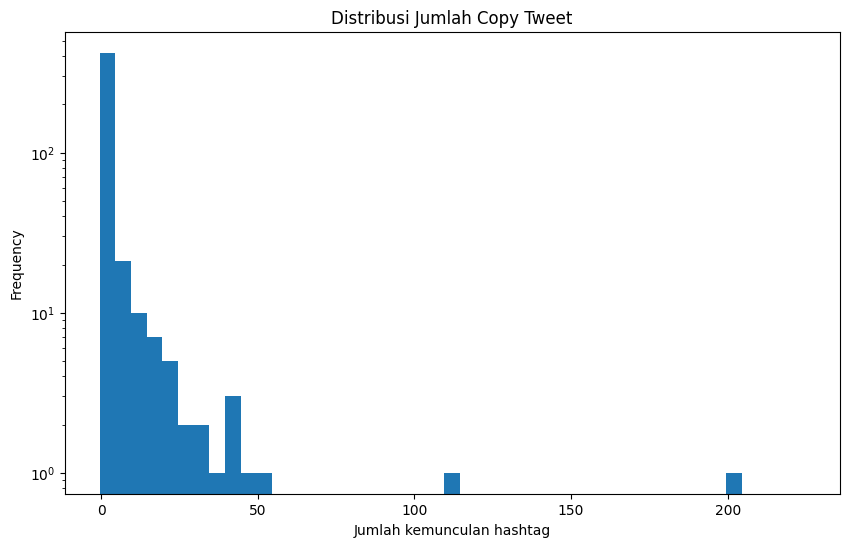

In [20]:
counts = flattened_hashtags_df.groupby(['hashtag']).size().reset_index(name='counts').counts
my_bins = np.arange(0, counts.max() + 2, 5) - 0.5

plt.figure(figsize=(10,6))
plt.hist(counts, bins=my_bins)
plt.xlabel('Jumlah kemunculan hashtag')
plt.ylabel('Frequency')
plt.yscale('log')  # supaya skala Y logaritmik, biar jelas distribusinya
plt.title('Distribusi Jumlah Copy Tweet')
plt.show()


### From Text to Vector

Kita pengen tau:

Hashtag apa aja yang sering muncul barengan?

Misalnya tweet dengan #funny dan #pets, kalau sering muncul bareng, berarti ada korelasi dong. Buat nemuin korelasinya, kita harus ubah list hashtag jadi data numerik (vektor 1 & 0), yang nunjukin:

- 1 → hashtag itu muncul

- 0 → hashtag itu nggak muncul

Contoh:

Hashtag yang mungkin:
[#photography, #pets, #funny, #day]

Tweet → "#funny #pets"
Vektor-nya: [0, 1, 1, 0]
Karena #pets dan #funny ada, sisanya enggak.



1. pilih hastag yang populer

Kita abaikan hashtag yang terlalu jarang muncul, karena bakal bikin data noise doang.

In [21]:
min_appearance = 10  # ambang batas minimal muncul
popular_hashtags_set = set(popular_hashtags[popular_hashtags.counts >= min_appearance]['hashtag'])


Jadi kita cuma ambil hashtag yang muncul minimal 10 kali buat analisis korelasi.

2. Filter Tweet yang Mengandung Hashtag Populer Aja

In [22]:
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
    lambda hashtag_list: [hashtag for hashtag in hashtag_list if hashtag in popular_hashtags_set])

popular_hashtags_list_df = hashtags_list_df.loc[
    hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list != [])]


In [29]:
popular_hashtags_list_df

,hashtags,popular_hashtags
12,"[#Climate, #population]",[#Climate]
16,[#EarthDay],[#EarthDay]
31,[#tcot],[#tcot]
36,"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,...","[#ocra, #sgp, #gop, #tlot, #p2]"
39,"[#tcot, #p2]","[#tcot, #p2]"
...,...,...
6076,"[#liberalFascism, #News, #tcot]","[#News, #tcot]"
6083,[#climate],[#climate]
6085,"[#p2, #tcot]","[#p2, #tcot]"
6087,"[#IPCC, #ocra]","[#IPCC, #ocra]"


3. Ubah Jadi Bentuk Vektor (One-Hot Encoding)

In [28]:
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    hashtag_vector_df[f'{hashtag}'] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))
    
hashtag_vector_df


,popular_hashtags,#green,#FoxNews,#climate,#agw,#tcot,#globalwarming,#sgp,#du1,#p2,...,#UN,#News,#cleantech,#fb,#eco,#Green,#cochabamba,#gop,#IPCC,#climatechange
12,[#Climate],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,[#EarthDay],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,[#tcot],0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,"[#ocra, #sgp, #gop, #tlot, #p2]",0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
39,"[#tcot, #p2]",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076,"[#News, #tcot]",0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6083,[#climate],0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6085,"[#p2, #tcot]",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6087,"[#IPCC, #ocra]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


4. Bersihin kolom lama

In [25]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)


5. Hitung Korelasi antar hashtag

In [26]:
correlations = hashtag_matrix.corr()


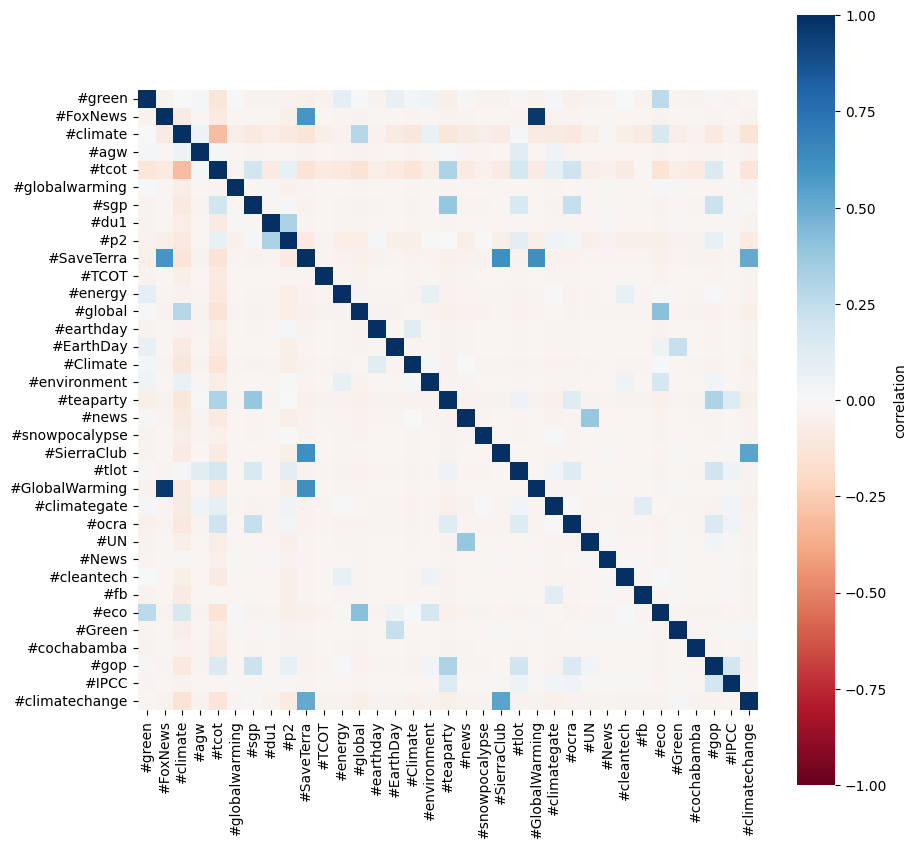

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={'label': 'correlation'})
plt.show()


## Modelling

buat nemuin “topik” yang tersembunyi dari sekumpulan dokumen (dalam kasus kita: tweet).

### Pembersihan Data Unstructure

Realita Tweet = berantakan parah ato masih kotor
- Campur aduk huruf besar/kecil
- Banyak link, mention, hashtag
- Ada emot, tanda baca, angka, dan singkatan aneh

In [30]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iki_rhmn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

hapus icon atau komponen unik

In [32]:
def remove_links(tweet):
    tweet = re.sub(r'http\S+', '', tweet)         # hapus http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)      # hapus bit.ly links
    tweet = tweet.strip('[link]')                 # hapus tag [link]
    return tweet

def remove_users(tweet):
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)   # hapus RT
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)       # hapus @username
    return tweet


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\iki_rhmn\AppData\Local\Temp\ipykernel_6512\1803569100.py:8: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)   # hapus RT


cleaning tweet yang gak terlalu penting

In [33]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)                      # hapus mention & RT
    tweet = remove_links(tweet)                      # hapus link
    tweet = tweet.lower()                            # jadi lowercase
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet)  # hapus tanda baca
    tweet = re.sub('\s+', ' ', tweet)                # hapus spasi ganda
    tweet = re.sub('([0-9]+)', '', tweet)            # hapus angka

    tweet_token_list = [word for word in tweet.split(' ')
                        if word not in my_stopwords] # hapus stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # stemming (kecuali hashtag)

    if bigrams:
        tweet_token_list += [tweet_token_list[i] + '_' + tweet_token_list[i + 1]
                             for i in range(len(tweet_token_list) - 1)]

    tweet = ' '.join(tweet_token_list)
    return tweet


<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\iki_rhmn\AppData\Local\Temp\ipykernel_6512\1758530159.py:10: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub('\s+', ' ', tweet)                # hapus spasi ganda


In [37]:
df['clean_tweet'] = df.tweet.apply(clean_tweet)
df['clean_tweet'].head(5)
df

,tweet,is_retweet,retweeted,mentioned,hashtags,clean_tweet
0,Global warming report urges governments to act...,False,[],[],[],global warm report urg govern act brussel belg...
1,Fighting poverty and global warming in Africa ...,False,[],[],[],fight poverti global warm africa
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],carbon offset vatican forest fail reduc global...
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],carbon offset vatican forest fail reduc global...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[],uruguay tool need vulner climat chang
...,...,...,...,...,...,...
6085,"@bloodless_coup ""The phrase 'global warming' s...",False,[],[@bloodless_coup],"[#p2, #tcot]",phrase global warm abandon favor climat chang...
6086,Virginia to Investigate Global Warming Scienti...,False,[],[],[],virginia investig global warm scientist mann
6087,Global warming you tube parody you will enjoy ...,False,[],[],"[#IPCC, #ocra]",global warm tube parodi enjoy #ipcc #ocra
6088,One-Eyed Golfer: Don't dare tell me about glob...,False,[],[],[],one eye golfer dare tell global warm twenti fi...


## Inference Modelling LDA

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

tf_feature_names = vectorizer.get_feature_names_out()


<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\iki_rhmn\AppData\Local\Temp\ipykernel_6512\2169389136.py:3: SyntaxWarning: invalid escape sequence '\w'
  vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')


In [40]:
print(tf.shape)  # Shape: (num_tweets, num_features)
print(tf_feature_names[:10])  # Preview top 10 surviving words

(6090, 425)
['#climate' '#climatechange' '#climategate' '#earthday' '#eco' '#energy'
 '#global' '#globalwarming' '#gop' '#green']


In [41]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)


LatentDirichletAllocation(random_state=0)

In [44]:
import pandas as pd

def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict[f"Topic {topic_idx} words"] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict[f"Topic {topic_idx} weights"] = [f"{topic[i]:.1f}" for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
topics_df = display_topics(model, tf_feature_names, no_top_words)
topics_df


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,climat,1220.2,global,666.5,global,1147.2,global,473.1,climat,422.0,global,783.0,chang,666.1,warm,167.9,climat,568.3,climat,529.9
1,chang,1184.5,warm,658.1,warm,1102.1,warm,450.7,chang,401.8,warm,764.7,climat,661.6,#climate,139.2,chang,550.5,chang,520.6
2,via,257.9,snow,160.5,scientist,150.2,believ,101.3,legisl,123.2,gore,137.1,energi,178.8,volcano,128.9,new,321.1,peopl,153.4
3,scienc,112.9,#tcot,121.6,say,87.1,california,87.1,us,105.1,snow,123.7,u,109.8,global,128.6,bill,116.9,world,151.3
4,news,79.5,like,99.0,scienc,71.7,blame,82.1,via,60.5,al,122.1,via,96.5,chang,122.0,senat,106.1,confer,110.1
5,day,77.8,blizzard,90.9,debat,66.6,law,78.6,say,55.9,great,94.1,nation,89.0,help,114.1,agenc,95.1,bill,106.4
6,earth,68.2,dc,86.5,man,61.1,report,77.8,video,55.9,cold,77.1,make,74.5,take,96.8,immigr,77.7,talk,94.8
7,trial,68.1,think,83.3,made,54.0,save,61.8,place,54.1,call,76.5,impact,67.5,climat,76.7,obama,75.6,graham,92.1
8,clinic,68.1,due,80.1,show,51.9,money,56.1,good,52.6,#tcot,75.3,report,63.4,iceland,67.1,feder,67.1,un,77.6
9,carbon,64.5,make,70.4,water,50.6,live,49.3,human,48.2,one,72.1,issu,58.8,could,64.5,via,58.6,put,68.8


## Bonus Challenges pake NMF

In [43]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=10, random_state=0)
nmf_model.fit(tf)
display_topics(nmf_model, tf_feature_names, no_top_words)


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,climat,8.9,global,5.8,via,5.1,snow,4.3,bill,3.6,new,4.1,#climate,3.2,peopl,2.8,say,3.0,#tcot,3.6
1,chang,8.0,warm,5.7,news,1.0,dc,1.5,senat,1.8,agenc,1.3,chang,3.1,world,2.5,report,2.2,#p,1.1
2,scienc,0.3,could,0.1,humanitarian,0.4,gore,1.1,graham,1.1,obama,0.9,#global,0.6,earth,1.7,caus,1.7,#teaparty,0.7
3,energi,0.3,scienc,0.1,chang,0.3,al,1.1,put,0.8,feder,0.8,#eco,0.5,confer,1.6,scientist,1.3,#gop,0.4
4,fight,0.2,stop,0.1,india,0.2,mean,1.0,limbo,0.6,form,0.7,warm,0.4,right,1.0,us,0.7,scam,0.4
5,legisl,0.2,think,0.1,com,0.2,storm,0.8,exit,0.5,studi,0.5,us,0.3,bolivia,0.8,may,0.6,dc,0.4
6,u,0.2,make,0.1,un,0.1,jr,0.8,climat,0.5,administr,0.5,fact,0.2,day,0.8,govern,0.6,gore,0.4
7,un,0.2,effect,0.1,environ,0.1,cold,0.8,compromis,0.5,propos,0.4,nasa,0.2,mother,0.7,u,0.3,al,0.4
8,get,0.2,believ,0.1,us,0.1,washington,0.7,prepar,0.5,york,0.4,#p,0.2,indigen,0.3,volcano,0.3,#ocra,0.3
9,action,0.2,volcano,0.1,impact,0.1,ago,0.7,immigr,0.4,report,0.4,thought,0.2,cochabamba,0.3,carbon,0.2,#tlot,0.3


## Kesimpulan

Dalam analisis ini, dilakukan serangkaian proses untuk menemukan pola topik tersembunyi di balik tweet-tweet yang membahas isu perubahan iklim. Berikut langkah-langkah dan temuan utamanya:

- ✅ Langkah-Langkah yang Telah Dilakukan:
    1. Pembersihan Data (Cleaning)
        - Menghapus tanda baca, angka, dan stopword
        - Mengubah semua teks menjadi huruf kecil
        - Hasil: tweet bersih yang siap untuk dianalisis
    2. Ekstraksi Fitur (Feature Extraction)
        - Menggunakan CountVectorizer untuk mengubah teks ke dalam bentuk matriks frekuensi kata (term frequency)
        - Disaring dengan max_df=0.9 dan min_df=25 untuk menghindari kata terlalu umum atau terlalu jarang
    3. Penerapan Model Topik
        - LDA (Latent Dirichlet Allocation) digunakan sebagai metode utama
        - Topik yang dihasilkan cenderung didominasi kata seperti: global, warming, climate, change, yang memang sangat umum pada data ini
        - Disadari bahwa kata-kata tersebut sebaiknya dihapus karena tidak informatif
    4. Eksperimen Alternatif dengan NMF (Non-negative Matrix Factorization)
        - NMF memberikan hasil topik yang lebih beragam dan mudah diinterpretasi
        - Lebih cocok untuk teks pendek seperti tweet

🔍 Temuan Utama:
Banyak topik didominasi oleh kata "climate", "global", dan "warming", menunjukkan bahwa kata-kata ini terlalu umum untuk dipakai dalam penentuan topik:
1. Dengan membersihkan kata-kata umum tersebut, model mampu menampilkan topik yang lebih spesifik, misalnya soal:
2. Kebijakan lingkungan (policy, carbon, emission)
3. Tokoh publik & politik (gore, trump, greta)
4. Kejadian alam (floods, storm, fire)

📌 Kesimpulan Akhir:
Model topik seperti LDA dan NMF dapat digunakan untuk menemukan pola dan tema besar dari kumpulan tweet tentang perubahan iklim. Namun, karena tweet bersifat sangat pendek, metode seperti NMF cenderung lebih efektif. Proses pra-pemrosesan seperti pembersihan teks dan penghapusan kata terlalu umum sangat penting agar topik yang dihasilkan benar-benar informatif dan relevan.

